In [1]:
### calling packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import time
from datetime import datetime

In [2]:
# pd.set_option('display.max_rows', None)

### 0. 통일성을 위한 공통 작업

In [3]:
### matplotlib, seaborn 한글 깨짐 현상 해결

from matplotlib import font_manager, rc # matplotlib, seaborn에서 한글 깨짐 현상을 해결하기 위함

font_path = "C:/WINDOWS/FONTS/MALGUNSL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
### 색상 통일

col=['#6B4E24','#EECA98','#EBAA4F','#6B5B45','#B8853E','#AB891A','#6B5610','#EBBC23','#F7B50F']

### 1. 연도별 평균 데이터를 이용해 전체적인 추이를 보자!

In [5]:
### '서울시 년도별 평균 대기오염도 정보.csv'를 ATM_yearly_df라는 데이터프레임 형태로 불러오기

ATM_yearly_df = pd.read_csv('C:/Users/izzle/Downloads/서울시 년도별 평균 대기오염도 정보.csv', encoding='cp949')
ATM_yearly_df.head(10)

,측정년도,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2023,강남구,0.041,0.012,0.7,0.004,63.0,38.0
1,2023,강남대로,0.044,0.009,1.0,0.004,68.0,44.0
2,2023,강동구,0.033,0.011,0.7,0.003,67.0,44.0
3,2023,강변북로,0.046,0.009,0.9,0.003,65.0,44.0
4,2023,강북구,0.032,0.016,0.8,0.003,64.0,34.0
5,2023,강서구,0.040,0.013,0.8,0.004,77.0,39.0
6,2023,공항대로,0.044,0.009,0.8,0.004,67.0,39.0
7,2023,관악구,0.043,0.011,0.8,0.003,68.0,37.0
8,2023,관악산,0.014,0.035,0.3,0.004,50.0,26.0
9,2023,광진구,0.027,0.011,0.8,0.003,62.0,38.0


In [6]:
### 광진구 자료만 추출하기

gwangjin_yearly = ATM_yearly_df[ATM_yearly_df['측정소명'] == '광진구']
gwangjin_yearly.head(10)

,측정년도,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
9,2023,광진구,0.027,0.011,0.8,0.003,62.0,38.0
59,2022,광진구,0.019,0.028,0.5,0.003,32.0,18.0
109,2021,광진구,0.020,0.027,0.5,0.003,37.0,20.0
159,2020,광진구,0.020,0.024,0.6,0.003,34.0,20.0
209,2019,광진구,0.027,0.022,0.7,0.004,43.0,27.0
259,2018,광진구,0.027,0.021,0.6,0.005,40.0,21.0
304,2017,광진구,0.031,0.028,0.6,0.004,42.0,25.0
343,2016,광진구,0.032,0.023,0.6,0.004,49.0,29.0
382,2015,광진구,0.031,0.021,0.5,0.005,45.0,22.0
422,2014,광진구,0.028,0.027,0.6,0.005,50.0,23.0


In [7]:
### 결측치

gwangjin_yearly.isnull().sum()

# 연도별 데이터의 경우 미세먼지, 초미세먼지에만 결측치가 존재
# 미세먼지, 초미세먼지를 제외한 다른 대기오염물질의 경우 측정이 1987년부터 시작되었는데,
# 미세먼지는 2000년부터, 초미세먼지는 2012년부터 측정 데이터가 존재하여 발생하는 결측치이므로 보간할 필요가 없다고 판단됨.

측정년도             0
측정소명             0
이산화질소농도(ppm)     0
오존농도(ppm)        0
일산화탄소농도(ppm)     0
아황산가스(ppm)       0
미세먼지(㎍/㎥)       13
초미세먼지(㎍/㎥)      25
dtype: int64

In [8]:
### 연도 범위 파악

print(gwangjin_yearly.max()['측정년도'])
print(gwangjin_yearly.min()['측정년도'])

2023
1987


In [9]:
### 초미세먼지 범위 파악

pd.DataFrame(gwangjin_yearly.dropna(axis=0, inplace=False))

# 서울시 년도별 평균 대기오염도 정보 파일에서 초미세먼지는 2012~2023 데이터가 존재

,측정년도,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
9,2023,광진구,0.027,0.011,0.8,0.003,62.0,38.0
59,2022,광진구,0.019,0.028,0.5,0.003,32.0,18.0
109,2021,광진구,0.020,0.027,0.5,0.003,37.0,20.0
159,2020,광진구,0.020,0.024,0.6,0.003,34.0,20.0
209,2019,광진구,0.027,0.022,0.7,0.004,43.0,27.0
259,2018,광진구,0.027,0.021,0.6,0.005,40.0,21.0
304,2017,광진구,0.031,0.028,0.6,0.004,42.0,25.0
343,2016,광진구,0.032,0.023,0.6,0.004,49.0,29.0
382,2015,광진구,0.031,0.021,0.5,0.005,45.0,22.0
422,2014,광진구,0.028,0.027,0.6,0.005,50.0,23.0


In [10]:
### 미세먼지 범위 파악

gwangjin_noPM25 = gwangjin_yearly.drop(['초미세먼지(㎍/㎥)'], axis=1, inplace=False)
gwangjin_noPM25.dropna(axis=0, inplace=False)

# 서울시 년도별 평균 대기오염도 정보 파일에서 미세먼지는 2000~2023 데이터가 존재

,측정년도,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥)
9,2023,광진구,0.027,0.011,0.8,0.003,62.0
59,2022,광진구,0.019,0.028,0.5,0.003,32.0
109,2021,광진구,0.020,0.027,0.5,0.003,37.0
159,2020,광진구,0.020,0.024,0.6,0.003,34.0
209,2019,광진구,0.027,0.022,0.7,0.004,43.0
259,2018,광진구,0.027,0.021,0.6,0.005,40.0
304,2017,광진구,0.031,0.028,0.6,0.004,42.0
343,2016,광진구,0.032,0.023,0.6,0.004,49.0
382,2015,광진구,0.031,0.021,0.5,0.005,45.0
422,2014,광진구,0.028,0.027,0.6,0.005,50.0


Text(0.5, 1.0, '광진구 이산화질소, 오존 농도 시계열 그래프(1987~2023)')

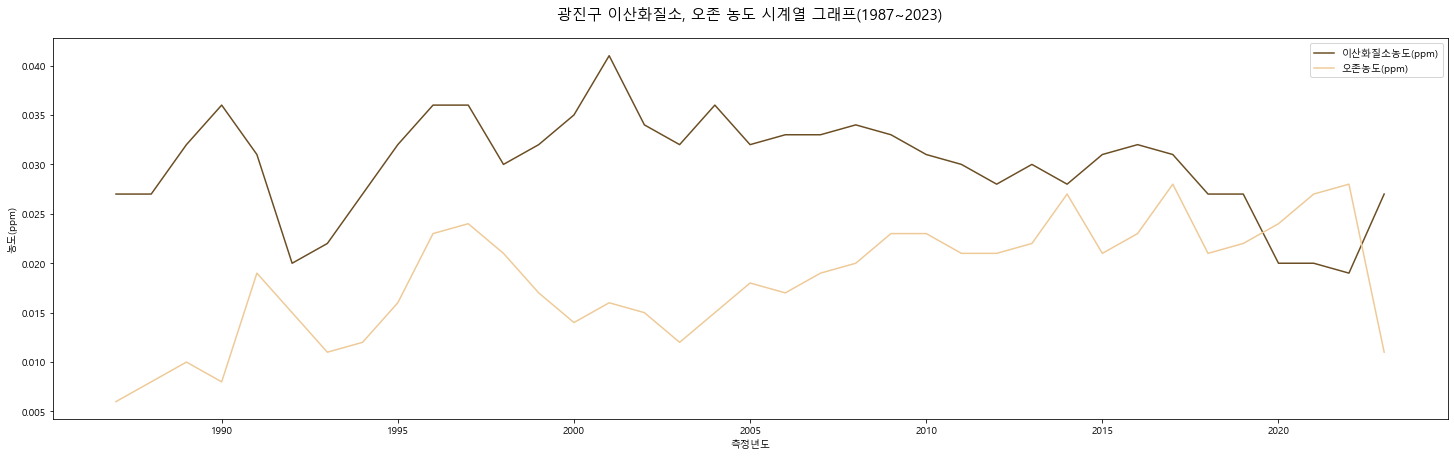

In [11]:
### 광진구 이산화탄소, 오존 농도 시계열 그래프(1987~2023)

gwangjin_yearly.plot(x='측정년도', y=['이산화질소농도(ppm)', '오존농도(ppm)'], color = col, figsize=(25, 7))
plt.ylabel('농도(ppm)')
plt.xlabel('측정년도')
plt.title('광진구 이산화질소, 오존 농도 시계열 그래프(1987~2023)', fontsize = 15, pad = 20)

# plt.savefig('광진구 이산화질소, 오존 농도 시계열.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0.5, 1.0, '광진구 미세먼지(2000~2023), 초미세먼지(2012~2023) 시계열 그래프')

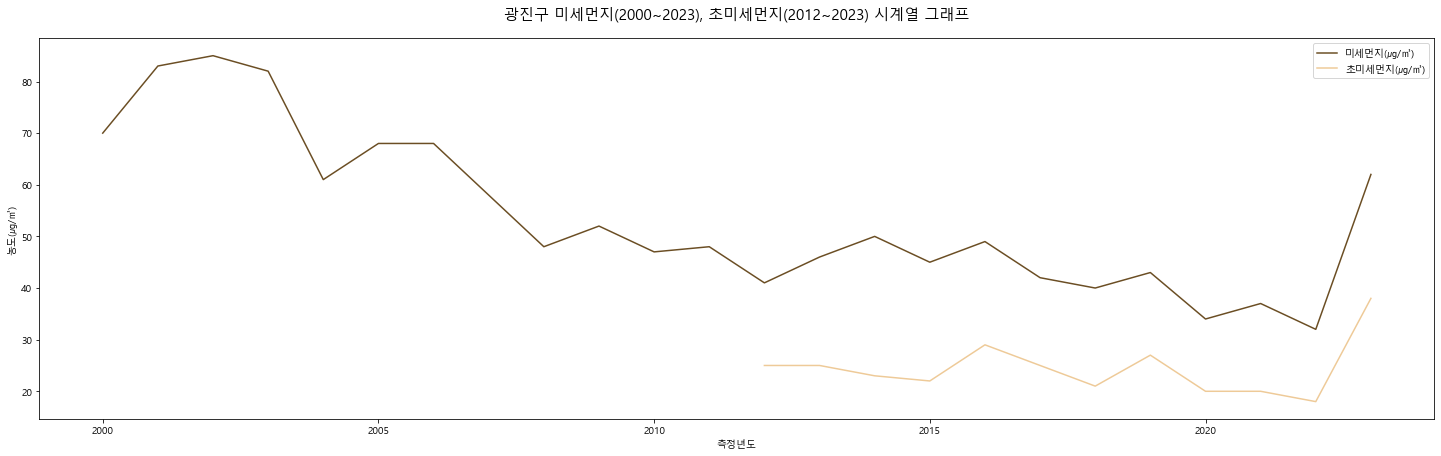

In [12]:
### 광진구 미세먼지(2000~2023), 초미세먼지(2012~2023) 시계열 그래프

gwangjin_yearly.plot(x='측정년도', y=['미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], color = col, figsize=(25, 7))
plt.ylabel('농도(㎍/㎥)')
plt.xlabel('측정년도')
plt.title('광진구 미세먼지(2000~2023), 초미세먼지(2012~2023) 시계열 그래프', fontsize = 15, pad = 20)

# plt.savefig('광진구 미세먼지, 초미세먼지 시계열.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)